In [2]:
%pylab inline
import pandas as pd
import os

# data visualization
import matplotlib.pyplot as plt

# NLP
import nltk

# Seaborn
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [8]:
# Read file into pandas
# 3 files are yelp_labelled.txt, amazon_cells_labelled.txt, imdb_labelled.txt
df = pd.read_csv('train.csv')
# Keeping only the neccessary columns
df = df[['text','stars']]
df['len'] = [len(x) for x in df['text']]

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 764.3764798737175
std = 723.2798036472004


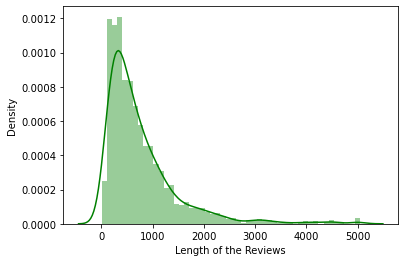

In [13]:
pos = df[(df['stars'] == 1)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

mean = 783.6115214180206
std = 663.1157976167817


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


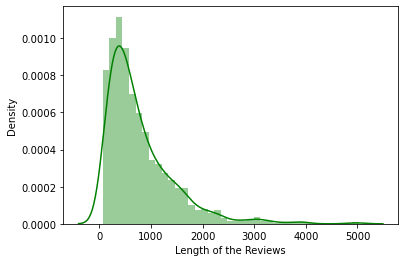

In [14]:
pos = df[(df['stars'] == 2)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 711.8834745762712
std = 611.028609851797


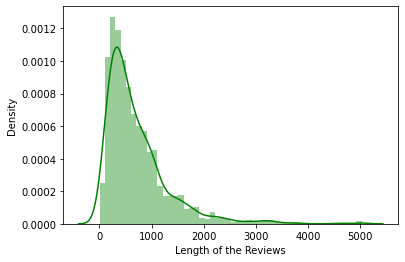

In [15]:
pos = df[(df['stars'] == 3)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 622.2687203791469
std = 553.4531891033731


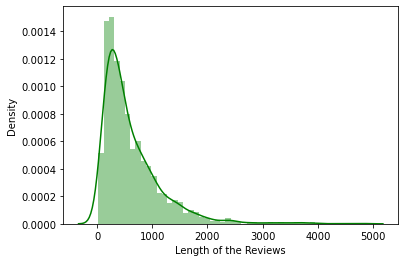

In [16]:
pos = df[(df['stars'] == 4)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 488.9995269631031
std = 465.6404491761355


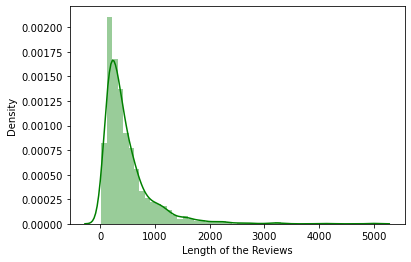

In [17]:
pos = df[(df['stars'] == 5)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print('mean =',mean(pos['len']))
print('std =', std(pos['len']))

In [18]:
df.describe(include="all")

,text,stars,len
count,10000,10000.000000,10000.000000
unique,10000,NaN,NaN
top,Yelpers get it right again! \r\n\r\nThe SO and...,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2.991600,668.870800
std,NaN,1.485177,620.352411
min,NaN,1.000000,8.000000
25%,NaN,1.000000,265.000000
50%,NaN,3.000000,478.000000
75%,NaN,4.000000,862.000000


In [19]:
# Mapping length of sentences
def len_vis(data_col):
    t_col = data_col.apply(lambda x: len(x))
    fig=plt.figure() #Plots in matplotlib reside within a figure object, use plt.figure to create new figure
    #Create one or more subplots using add_subplot, because you can't create blank figure
    ax = fig.add_subplot(1,1,1)
    #Variable
    ax.hist(t_col,bins = 50) # Here you can play with number of bins

    plt.title('Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()

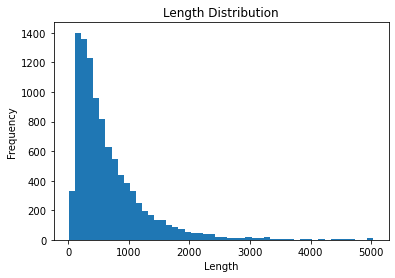

In [20]:
len_vis(df['text'])

In [21]:
def count_unique(words):
    uniq = set()
    for sentence in words:
        for word in sentence:
            uniq.add(word)
    return len(uniq)

In [24]:

#tokenize without the punctuation
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
# make reviews lowercase
df['text'] = df['text'].apply(lambda x: x.lower())
# tokenize
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x))
# visual check
df.head()

,text,stars,len
0,"[nice, to, have, a, diner, still, around, food...",4,102
1,"[tried, this, a, while, back, got, the, fried,...",2,494
2,"[i, expected, more, pork, selections, on, menu...",4,193
3,"[yummy, this, place, is, phenomenal, it, is, p...",4,207
4,"[the, truffle, macaroni, cheese, and, potatoes...",5,159


In [25]:
# Check feature count
count_unique(df['text'])

28074

In [27]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [28]:
# POS tag
df['posr']= df['text'].apply(lambda x: nltk.pos_tag(x))
# Leave the non POS removal ones alone
df['nposr'] = df['text']

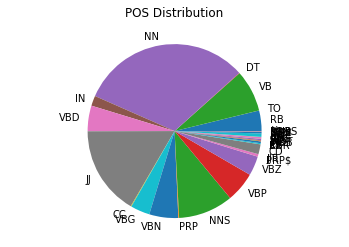

In [29]:
# Visualize Parts of Speech
pos_dict = {}
for sent in df['posr']:
    for pair in sent:
        if pair[1] in pos_dict:
            pos_dict[pair[1]].add(pair[0])
        else:
            pos_dict.update({pair[1]: set(pair[0])})

# Pie chart of POS distribution
temp = pos_dict.values()
x_list = []
for x in temp: 
    x_list.append(len(x))
label_list = pos_dict.keys()
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list) 
plt.title("POS Distribution")
plt.show()

In [30]:
df.head()

,text,stars,len,posr,nposr
0,"[nice, to, have, a, diner, still, around, food...",4,102,"[(nice, RB), (to, TO), (have, VB), (a, DT), (d...","[nice, to, have, a, diner, still, around, food..."
1,"[tried, this, a, while, back, got, the, fried,...",2,494,"[(tried, VBN), (this, DT), (a, DT), (while, NN...","[tried, this, a, while, back, got, the, fried,..."
2,"[i, expected, more, pork, selections, on, menu...",4,193,"[(i, NN), (expected, VBD), (more, RBR), (pork,...","[i, expected, more, pork, selections, on, menu..."
3,"[yummy, this, place, is, phenomenal, it, is, p...",4,207,"[(yummy, NN), (this, DT), (place, NN), (is, VB...","[yummy, this, place, is, phenomenal, it, is, p..."
4,"[the, truffle, macaroni, cheese, and, potatoes...",5,159,"[(the, DT), (truffle, NN), (macaroni, NN), (ch...","[the, truffle, macaroni, cheese, and, potatoes..."


In [31]:
# Collection of adjectives, nouns, adverbs and verbs to keep
pos_keep = ["JJ","JJR","JJS","NN","NNP","NNS","RB","RBR","VB","VBD","VBG","VBN","VBZ"]


def remove_pos(full):
    redc =[]
    for pair in full:
        if pair[1] in pos_keep:
            redc.append(pair[0])
    return redc
# Remove the words that are not in pos_keep
df['posr']= df['posr'].apply(lambda x: remove_pos(x))

df.head()

,text,stars,len,posr,nposr
0,"[nice, to, have, a, diner, still, around, food...",4,102,"[nice, have, diner, still, food, was, good, co...","[nice, to, have, a, diner, still, around, food..."
1,"[tried, this, a, while, back, got, the, fried,...",2,494,"[tried, while, back, got, fried, chicken, sand...","[tried, this, a, while, back, got, the, fried,..."
2,"[i, expected, more, pork, selections, on, menu...",4,193,"[i, expected, more, pork, selections, menu, fo...","[i, expected, more, pork, selections, on, menu..."
3,"[yummy, this, place, is, phenomenal, it, is, p...",4,207,"[yummy, place, is, phenomenal, is, pricey, urg...","[yummy, this, place, is, phenomenal, it, is, p..."
4,"[the, truffle, macaroni, cheese, and, potatoes...",5,159,"[truffle, macaroni, cheese, potatoes, gratin, ...","[the, truffle, macaroni, cheese, and, potatoes..."


In [32]:
print(count_unique(df['posr']))

26660


In [33]:

# Import the list of stopwords from NLTK
from nltk.corpus import stopwords

# Remove the stopwords and store in "No Stops" column
stop = set(stopwords.words('english'))
# Ensure "not" is kept
stop.remove("not")
df['posr_stpd'] = df['posr'].apply(lambda x: [item for item in x if item not in stop])
df['nposr_stpd'] = df['nposr'].apply(lambda x: [item for item in x if item not in stop])
df['posr_nstpd'] = df['posr']
df['nposr_nstpd'] = df['nposr']
# visual check
df.head()

,text,stars,len,posr,nposr,posr_stpd,nposr_stpd,posr_nstpd,nposr_nstpd
0,"[nice, to, have, a, diner, still, around, food...",4,102,"[nice, have, diner, still, food, was, good, co...","[nice, to, have, a, diner, still, around, food...","[nice, diner, still, food, good, comforting, d...","[nice, diner, still, around, food, good, comfo...","[nice, have, diner, still, food, was, good, co...","[nice, to, have, a, diner, still, around, food..."
1,"[tried, this, a, while, back, got, the, fried,...",2,494,"[tried, while, back, got, fried, chicken, sand...","[tried, this, a, while, back, got, the, fried,...","[tried, back, got, fried, chicken, sandwich, m...","[tried, back, got, fried, chicken, sandwich, m...","[tried, while, back, got, fried, chicken, sand...","[tried, this, a, while, back, got, the, fried,..."
2,"[i, expected, more, pork, selections, on, menu...",4,193,"[i, expected, more, pork, selections, menu, fo...","[i, expected, more, pork, selections, on, menu...","[expected, pork, selections, menu, food, good,...","[expected, pork, selections, menu, food, good,...","[i, expected, more, pork, selections, menu, fo...","[i, expected, more, pork, selections, on, menu..."
3,"[yummy, this, place, is, phenomenal, it, is, p...",4,207,"[yummy, place, is, phenomenal, is, pricey, urg...","[yummy, this, place, is, phenomenal, it, is, p...","[yummy, place, phenomenal, pricey, urge, splur...","[yummy, place, phenomenal, pricey, feel, urge,...","[yummy, place, is, phenomenal, is, pricey, urg...","[yummy, this, place, is, phenomenal, it, is, p..."
4,"[the, truffle, macaroni, cheese, and, potatoes...",5,159,"[truffle, macaroni, cheese, potatoes, gratin, ...","[the, truffle, macaroni, cheese, and, potatoes...","[truffle, macaroni, cheese, potatoes, gratin, ...","[truffle, macaroni, cheese, potatoes, au, grat...","[truffle, macaroni, cheese, potatoes, gratin, ...","[the, truffle, macaroni, cheese, and, potatoes..."


In [34]:
# check feature count
count_unique(df['posr_stpd'])

26573

In [35]:

ps = nltk.PorterStemmer()
ss = nltk.SnowballStemmer('english')
ls = nltk.LancasterStemmer()

# No Stemming
df['nposr_nstpd_nstem'] = df['nposr_nstpd']
df['posr_nstpd_nstem'] = df['posr_nstpd']
df['nposr_stpd_nstem'] = df['nposr_stpd']
df['posr_stpd_nstem'] = df['posr_stpd']
# Porter
df['nposr_nstpd_port'] = df['nposr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_nstpd_port'] = df['posr_nstpd'].apply(lambda x: [ps.stem(y) for y in x])
df['nposr_stpd_port'] = df['nposr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
df['posr_stpd_port'] = df['posr_stpd'].apply(lambda x: [ps.stem(y) for y in x])
# Snowball
df['nposr_nstpd_snow'] = df['nposr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_nstpd_snow'] = df['posr_nstpd'].apply(lambda x: [ss.stem(y) for y in x])
df['nposr_stpd_snow'] = df['nposr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
df['posr_stpd_snow'] = df['posr_stpd'].apply(lambda x: [ss.stem(y) for y in x])
# Lancaster
df['nposr_nstpd_lanc'] = df['nposr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_nstpd_lanc'] = df['posr_nstpd'].apply(lambda x: [ls.stem(y) for y in x])
df['nposr_stpd_lanc'] = df['nposr_stpd'].apply(lambda x: [ls.stem(y) for y in x])
df['posr_stpd_lanc'] = df['posr_stpd'].apply(lambda x: [ls.stem(y) for y in x])

df.head()

,text,stars,len,posr,nposr,posr_stpd,nposr_stpd,posr_nstpd,nposr_nstpd,nposr_nstpd_nstem,...,nposr_stpd_port,posr_stpd_port,nposr_nstpd_snow,posr_nstpd_snow,nposr_stpd_snow,posr_stpd_snow,nposr_nstpd_lanc,posr_nstpd_lanc,nposr_stpd_lanc,posr_stpd_lanc
0,"[nice, to, have, a, diner, still, around, food...",4,102,"[nice, have, diner, still, food, was, good, co...","[nice, to, have, a, diner, still, around, food...","[nice, diner, still, food, good, comforting, d...","[nice, diner, still, around, food, good, comfo...","[nice, have, diner, still, food, was, good, co...","[nice, to, have, a, diner, still, around, food...","[nice, to, have, a, diner, still, around, food...",...,"[nice, diner, still, around, food, good, comfo...","[nice, diner, still, food, good, comfort, defi...","[nice, to, have, a, diner, still, around, food...","[nice, have, diner, still, food, was, good, co...","[nice, diner, still, around, food, good, comfo...","[nice, diner, still, food, good, comfort, defi...","[nic, to, hav, a, din, stil, around, food, was...","[nic, hav, din, stil, food, was, good, comfort...","[nic, din, stil, around, food, good, comfort, ...","[nic, din, stil, food, good, comfort, definit,..."
1,"[tried, this, a, while, back, got, the, fried,...",2,494,"[tried, while, back, got, fried, chicken, sand...","[tried, this, a, while, back, got, the, fried,...","[tried, back, got, fried, chicken, sandwich, m...","[tried, back, got, fried, chicken, sandwich, m...","[tried, while, back, got, fried, chicken, sand...","[tried, this, a, while, back, got, the, fried,...","[tried, this, a, while, back, got, the, fried,...",...,"[tri, back, got, fri, chicken, sandwich, meh, ...","[tri, back, got, fri, chicken, sandwich, meh, ...","[tri, this, a, while, back, got, the, fri, chi...","[tri, while, back, got, fri, chicken, sandwich...","[tri, back, got, fri, chicken, sandwich, meh, ...","[tri, back, got, fri, chicken, sandwich, meh, ...","[tri, thi, a, whil, back, got, the, fri, chick...","[tri, whil, back, got, fri, chick, sandwich, w...","[tri, back, got, fri, chick, sandwich, meh, pr...","[tri, back, got, fri, chick, sandwich, meh, pr..."
2,"[i, expected, more, pork, selections, on, menu...",4,193,"[i, expected, more, pork, selections, menu, fo...","[i, expected, more, pork, selections, on, menu...","[expected, pork, selections, menu, food, good,...","[expected, pork, selections, menu, food, good,...","[i, expected, more, pork, selections, menu, fo...","[i, expected, more, pork, selections, on, menu...","[i, expected, more, pork, selections, on, menu...",...,"[expect, pork, select, menu, food, good, beer,...","[expect, pork, select, menu, food, good, beer,...","[i, expect, more, pork, select, on, menu, food...","[i, expect, more, pork, select, menu, food, ve...","[expect, pork, select, menu, food, good, beer,...","[expect, pork, select, menu, food, good, beer,...","[i, expect, mor, pork, select, on, menu, food,...","[i, expect, mor, pork, select, menu, food, ver...","[expect, pork, select, menu, food, good, beer,...","[expect, pork, select, menu, food, good, beer,..."
3,"[yummy, this, place, is, phenomenal, it, is, p...",4,207,"[yummy, place, is, phenomenal, is, pricey, urg...","[yummy, this, place, is, phenomenal, it, is, p...","[yummy, place, phenomenal, pricey, urge, splur...","[yummy, place, phenomenal, pricey, feel, urge,...","[yummy, place, is, phenomenal, is, pricey, urg...","[yummy, this, place, is, phenomenal, it, is, p...","[yummy, this, place, is, phenomenal, it, is, p...",...,"[yummi, place, phenomen, pricey, feel, urg, sp...","[yummi, place, phenomen, pricey, urg, splurg, ...","[yummi, this, place, is, phenomen, it, is, pri...","[yummi, place, is, phenomen, is, pricey, urg, ...","[yummi, place, phenomen, pricey, feel, urg, sp...","[yummi, place, phenomen, pricey, urg, splurg, ...","[yummy, thi, plac, is, phenom, it, is, pricey,...","[yummy, plac, is, phenom, is, pricey, urg, spl...","[yummy, plac, phenom, pricey, feel, urg, splur...","[yummy,

In [36]:
# put final to csv just in case need a file
df.to_csv('final.csv')

In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [136]:
da = df['posr_stpd_port'].apply(lambda x: " ".join(x))

In [137]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(da)
X = tokenizer.texts_to_sequences(da)
X = pad_sequences(X)

In [138]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 411, 128)          256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 411, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 985       
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None


In [139]:
Y = pd.get_dummies(df['stars']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6700, 411) (6700, 5)
(3300, 411) (3300, 5)


In [140]:
batch_size = 100
model.fit(X_train, Y_train, epochs = 12, batch_size=batch_size, verbose = 1, validation_data = (X_test, Y_test))

Epoch 1/12
67/67 [==============================] - 221s 3s/step - loss: 1.5410 - accuracy: 0.2969 - val_loss: 1.1846 - val_accuracy: 0.4815
Epoch 2/12
67/67 [==============================] - 228s 3s/step - loss: 1.0886 - accuracy: 0.5482 - val_loss: 1.0388 - val_accuracy: 0.5536
Epoch 3/12
67/67 [==============================] - 231s 3s/step - loss: 0.9455 - accuracy: 0.5912 - val_loss: 1.0330 - val_accuracy: 0.5658
Epoch 4/12
67/67 [==============================] - 237s 4s/step - loss: 0.8492 - accuracy: 0.6448 - val_loss: 1.0727 - val_accuracy: 0.5488
Epoch 5/12
67/67 [==============================] - 246s 4s/step - loss: 0.8045 - accuracy: 0.6564 - val_loss: 1.0859 - val_accuracy: 0.5418
Epoch 6/12
67/67 [==============================] - 262s 4s/step - loss: 0.7515 - accuracy: 0.6915 - val_loss: 1.1177 - val_accuracy: 0.5524
Epoch 7/12
67/67 [==============================] - 285s 4s/step - loss: 0.7200 - accuracy: 0.7027 - val_loss: 1.1137 - val_accuracy: 0.5485
Epoch 8/12
67

In [124]:
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

104/104 [==============================] - 11s 110ms/step - loss: 1.5872 - accuracy: 0.5167
score: 1.59
acc: 0.52
